In [3]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import graphviz

from numpy.linalg import cond
from numpy import array, dot, exp

from scipy.ndimage import convolve

from sklearn import linear_model, datasets, metrics, tree
from sklearn.preprocessing  import MinMaxScaler
from sklearn.datasets       import load_digits, load_iris
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model   import LogisticRegression
from sklearn.svm            import LinearSVC
from sklearn.pipeline       import Pipeline
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



# RBM 

Ejemplos de uso de la Restricted Boltzmann Machine para determinar atributos en clasificación y para reconstrucción de imágenes.

## RBM para Iris

In [13]:
iris = load_iris()
data = MinMaxScaler().fit_transform(iris.data)
print(data[:10])
etqs = iris.target
Xtr, Xts, ytr, yts = train_test_split(data, etqs)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


In [14]:
rbm = BernoulliRBM()
lgt = LogisticRegression(solver='newton-cg')
pipe = Pipeline([("rbm",rbm), ("lgt",lgt)])

params = { "rbm__learning_rate" : [0.1, 0.09, 0.05],
           "rbm__n_components"  : [2,3,4],
           "rbm__n_iter"        : [10, 20],
           "lgt__C"             : [50, 100]
         }
rv = GridSearchCV(pipe, params)
rv.fit(Xtr,ytr)

GridSearchCV(estimator=Pipeline(steps=[('rbm', BernoulliRBM()),
                                       ('lgt',
                                        LogisticRegression(solver='newton-cg'))]),
             param_grid={'lgt__C': [50, 100],
                         'rbm__learning_rate': [0.1, 0.09, 0.05],
                         'rbm__n_components': [2, 3, 4],
                         'rbm__n_iter': [10, 20]})

In [15]:
print(rv.best_score_)
prms = rv.best_params_
print(prms)

0.8229249011857707
{'lgt__C': 100, 'rbm__learning_rate': 0.1, 'rbm__n_components': 3, 'rbm__n_iter': 20}


In [16]:
rbm = BernoulliRBM()
lgt = LogisticRegression(solver='newton-cg')
pipe = Pipeline([("rbm",rbm), ("lgt",lgt)])
rbm.n_components = 2
rbm.learning_rate = 0.1
rbm.n_iter = 20
lgt.C = 100
lgt.solver = 'newton-cg'
pipe = Pipeline( [("rbm", rbm), ("lgt",lgt)] )
pipe.fit(Xtr,ytr)

Pipeline(steps=[('rbm', BernoulliRBM(n_components=2, n_iter=20)),
                ('lgt', LogisticRegression(C=100, solver='newton-cg'))])

In [17]:
rbm.components_

array([[-0.3303459 , -0.19409834, -0.32238585, -0.31943798],
       [-0.32304692, -0.19261729, -0.31972147, -0.32312731]])

In [18]:
Yh = pipe.predict(Xts)
V = rbm.transform(Xts)
for y, yh, v in zip(yts, Yh, V):
    print("{0} - {1} - {2}".format(y,yh, v))

2 - 2 - [0.0549195  0.05508401]
1 - 2 - [0.06696543 0.06717104]
0 - 0 - [0.1002948  0.10039922]
2 - 2 - [0.04777433 0.04806696]
2 - 1 - [0.07991666 0.07989532]
2 - 2 - [0.05743181 0.05756862]
2 - 2 - [0.06187704 0.06204082]
0 - 0 - [0.10592958 0.10596834]
0 - 0 - [0.1161497  0.11609658]
0 - 0 - [0.10204026 0.10220342]
1 - 1 - [0.0811208  0.08131134]
0 - 0 - [0.09931045 0.09952571]
1 - 1 - [0.07431396 0.07453349]
2 - 2 - [0.05033532 0.050553  ]
1 - 1 - [0.07247314 0.07271028]
0 - 0 - [0.10448853 0.10461137]
0 - 0 - [0.09826035 0.0984124 ]
0 - 0 - [0.10223998 0.10237749]
2 - 2 - [0.05926763 0.05940075]
0 - 0 - [0.10432245 0.10445785]
2 - 2 - [0.05577457 0.05597589]
2 - 2 - [0.05672218 0.05701065]
1 - 0 - [0.09112209 0.09115193]
1 - 1 - [0.07017196 0.07043756]
1 - 1 - [0.08303537 0.08312617]
2 - 2 - [0.06775011 0.06788686]
2 - 2 - [0.06244926 0.06263203]
1 - 1 - [0.08034665 0.0804638 ]
1 - 1 - [0.08678263 0.08690788]
2 - 2 - [0.05598337 0.05611509]
2 - 2 - [0.05690815 0.05720307]
0 - 0 - 

In [19]:
print(metrics.classification_report(yts,Yh))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.89      0.80      0.84        10
           2       0.93      0.93      0.93        15

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



In [20]:
V = rbm.transform(Xts)
for y,v in zip(yts,V):
    ft = np.argmax(v)
    print("{0} - {1}".format(y,ft))


2 - 1
1 - 1
0 - 1
2 - 1
2 - 0
2 - 1
2 - 1
0 - 1
0 - 0
0 - 1
1 - 1
0 - 1
1 - 1
2 - 1
1 - 1
0 - 1
0 - 1
0 - 1
2 - 1
0 - 1
2 - 1
2 - 1
1 - 1
1 - 1
1 - 1
2 - 1
2 - 1
1 - 1
1 - 1
2 - 1
2 - 1
0 - 1
2 - 1
1 - 1
0 - 1
0 - 1
2 - 1
0 - 1


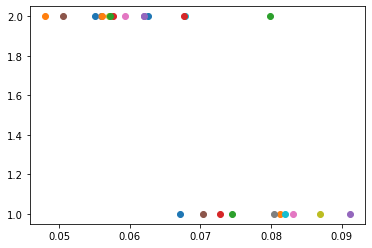

In [21]:
W = sorted(zip(yts,V), key=lambda x: x[0])

T = [(w[1][1],w[0]) for w in W if w[0]!=0]
for t in T:
    plt.scatter(t[0],t[1])
plt.show()

## RBM para dígitos

In [40]:
def nudge_dataset(X, Y):
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

digits = load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)


In [41]:
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

In [42]:
rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 100

logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)


[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.29s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.37s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.33s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.46s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.32s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.43s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.34s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.32s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.33s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.41s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.32s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.32s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.33s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.32s
[BernoulliRBM] Iteration 15, 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=100.0)

In [26]:

print()
print("Pipeline Logistic + RBM:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))


Pipeline Logistic + RBM:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.90      0.90      0.90       184
           2       0.86      0.93      0.90       166
           3       0.89      0.87      0.88       194
           4       0.96      0.91      0.93       186
           5       0.90      0.91      0.90       181
           6       0.96      0.96      0.96       207
           7       0.92      0.98      0.95       154
           8       0.86      0.85      0.85       182
           9       0.89      0.83      0.86       169

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797


Logistic:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       174
           1       0.58      0.57      0.58       184
           2       0.75      0.85      0.

In [27]:
rbm.components_

array([[-4.04238111e-01, -1.35925630e-01, -6.76190522e-03, ...,
        -4.40564107e-01, -4.16905372e-01, -3.37892545e-01],
       [-4.85343368e-01, -7.22034837e-01, -7.93680293e-01, ...,
        -3.44545277e-01, -7.10465176e-01, -5.35586470e-01],
       [-3.26872638e-02,  3.49365530e-02, -4.17062553e-03, ...,
        -2.30615588e-01, -2.46669759e-01, -3.91089920e-01],
       ...,
       [-6.01114951e-01, -8.75882044e-01, -7.86172361e-01, ...,
        -1.12449686e+00, -1.09010817e+00, -7.15011226e-01],
       [-1.99361466e-02,  3.81272213e-01,  3.65042737e-01, ...,
        -8.66709121e-01, -8.18679977e-01, -4.36909741e-01],
       [ 8.73349987e-04,  2.59311296e-02,  1.40647856e-02, ...,
         6.94241123e-02, -1.33831315e-02, -2.00651261e-01]])

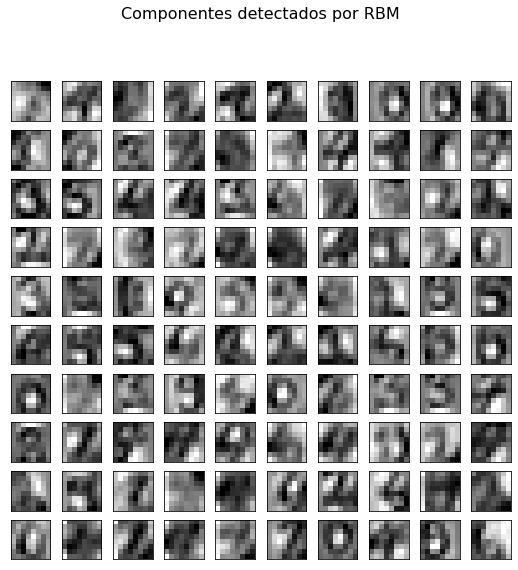

In [28]:

plt.figure(figsize=(8.4, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Componentes detectados por RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

0
1
2
3
4
5
6
7
8
9


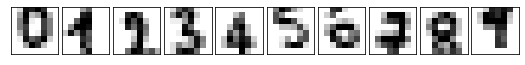

In [29]:
numeros = [0,1,2,3,4,5,6,7,8,9]
Xv = []
for n in numeros:
    for x,y in zip(X_train, Y_train):
        if y==n:
            print(y)
            Xv.append(x)
            break

plt.figure(figsize=(8.4, 8))
for num in numeros:
    plt.subplot(1, 10, num + 1)
    plt.imshow(Xv[num].reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()    
